## Import necessary packages

In [58]:
import tensorflow as tf
import scipy as sp
import scipy.misc
import numpy as np
import pandas as pd
import PIL
import scipy.ndimage as spi
import matplotlib.pyplot as plt
import keras 
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


import glob
import cv2
%matplotlib inline
np.random.seed(42)


## Second dataset

In [43]:
OxDATASET_PATH = r'/Users/pinchun/Documents/Orchid/Oxford/data/'
OxLABEL_PATH = r'/Users/pinchun/Documents/Orchid/Oxford/label.csv'



In [59]:
Oxdata_labels = pd.read_csv(OxLABEL_PATH)
Oxtarget_labels = Oxdata_labels['category']
print('Data has '+str(len(set(Oxtarget_labels)))+' classes')
Oxdata_labels.head()

Data has 102 classes


,category
0,77
1,77
2,77
3,77
4,77


In [61]:
oxflow_files = glob.glob(OxDATASET_PATH+"*")
Oxdata_labels['image_path'] = oxflow_files
Oxdata_labels.head()

,category,image_path
0,77,/Users/pinchun/Documents/Orchid/Oxford/data/im...
1,77,/Users/pinchun/Documents/Orchid/Oxford/data/im...
2,77,/Users/pinchun/Documents/Orchid/Oxford/data/im...
3,77,/Users/pinchun/Documents/Orchid/Oxford/data/im...
4,77,/Users/pinchun/Documents/Orchid/Oxford/data/im...


### Show Oxford flower

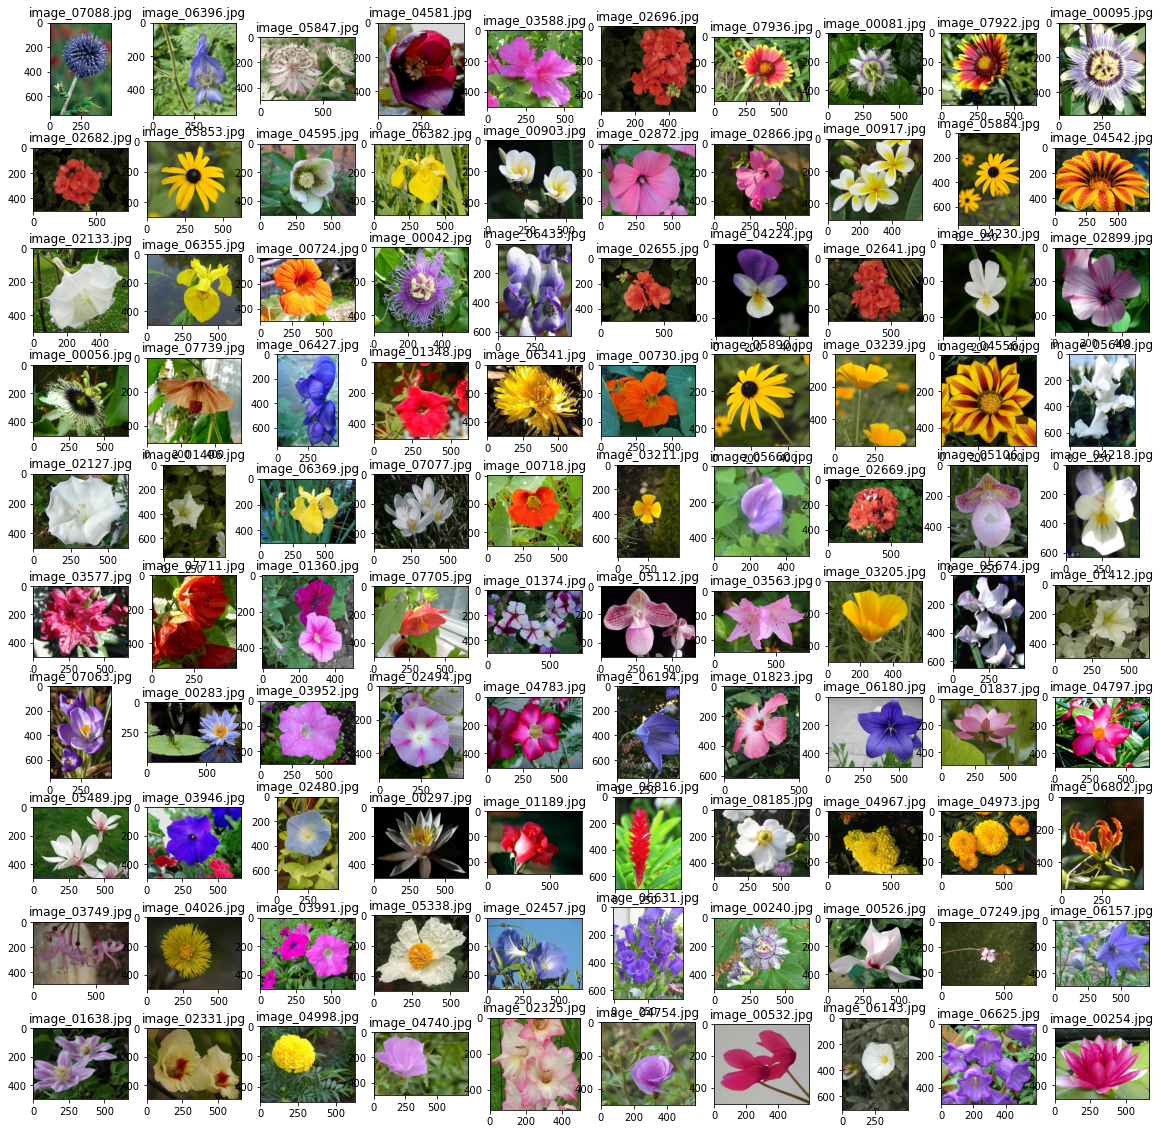

In [65]:
f, ax = plt.subplots(10, 10)
f.set_size_inches(20, 20)
im_scale_x=64
im_scale_y=64
img_idx = 0


for i in range(10):
    for j in range(10):
        ax[i][j].set_title(Oxdata_labels.iloc[img_idx]['image_path'].split('/')[-1])
        img = cv2.cvtColor(cv2.imread(Oxdata_labels.iloc[img_idx]['image_path']), cv2.COLOR_BGR2RGB)
        ax[i][j].imshow(img)
        img_idx = img_idx+1
            
plt.show()

Import neccessary libraries

In [6]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img

Load dataset

In [66]:
Oxtrain_data = np.array([img_to_array(load_img(img, target_size=(224, 224)))
                           for img in Oxdata_labels['image_path'].values.tolist()
                      ]).astype('float32')

Create train and validation datasets

In [67]:
x_ox_train, x_ox_val, y_ox_train, y_ox_val = train_test_split(Oxtrain_data, Oxtarget_labels,
                                                  test_size=0.2, 
                                                  stratify=np.array(Oxtarget_labels), 
                                                  random_state=42)
print('Initial Dataset Size:', train_data.shape)
print('Train and Validation Datasets Size:', x_train.shape, x_val.shape)
print('Train and Validation Datasets Size:', x_train.shape, x_val.shape)


Initial Dataset Size: (2190, 224, 224, 3)
Train and Validation Datasets Size: (1971, 224, 224, 3) (219, 224, 224, 3)
Train and Validation Datasets Size: (1971, 224, 224, 3) (219, 224, 224, 3)


Convert the text class labels to one-hot encoded labels

In [68]:
y_ox_train_ohe = pd.get_dummies(y_ox_train.reset_index(drop=True)).to_numpy()
y_ox_val_ohe = pd.get_dummies(y_ox_val.reset_index(drop=True)).to_numpy()

y_ox_train_ohe.shape, y_ox_val_ohe.shape

((6551, 102), (1638, 102))

Image Augmentation

In [69]:
BATCH_SIZE = 32

# Create train generator.
Oxtrain_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true',
                                   zoom_range=0.2,
                                   brightness_range=[0.2,1.2]) # brightness)
Oxtrain_generator = Oxtrain_datagen.flow(x_ox_train, y_ox_train_ohe, shuffle=False, 
                                     batch_size=BATCH_SIZE, seed=1)
                                     
# Create validation generator
Oxval_datagen = ImageDataGenerator(rescale = 1./255)
Oxval_generator = Oxtrain_datagen.flow(x_ox_val, y_ox_val_ohe, shuffle=False, 
                                   batch_size=BATCH_SIZE, seed=1)       

## Orchid Data

Set data and label path

In [96]:
DATASET_PATH = r'/Users/pinchun/Documents/Orchid/data/'
LABEL_PATH = r'/Users/pinchun/Documents/Orchid/label.csv'


Let’s start by looking at how the dataset labels look like to get an idea of what we are dealing with.

In [97]:
data_labels = pd.read_csv(LABEL_PATH)
target_labels = data_labels['category']
print('Data has '+str(len(set(target_labels)))+' classes')
data_labels.head()


Data has 219 classes


,filename,category
0,me3uqlixjn.jpg,0
1,5c0vsrdtpq.jpg,0
2,swixut5b3l.jpg,0
3,m0eqa926lo.jpg,0
4,5jr6x2y9p8.jpg,0


Add in the exact image path for each image present in the disk using the following code. This will help us in easily locating and loading up the images during model training.

In [98]:
train_folder = '/Users/pinchun/Documents/Orchid/data/'
data_labels['image_path'] = data_labels.apply(lambda row: (train_folder + row["filename"]), 
                                              axis=1)
data_labels.head()

,filename,category,image_path
0,me3uqlixjn.jpg,0,/Users/pinchun/Documents/Orchid/data/me3uqlixj...
1,5c0vsrdtpq.jpg,0,/Users/pinchun/Documents/Orchid/data/5c0vsrdtp...
2,swixut5b3l.jpg,0,/Users/pinchun/Documents/Orchid/data/swixut5b3...
3,m0eqa926lo.jpg,0,/Users/pinchun/Documents/Orchid/data/m0eqa926l...
4,5jr6x2y9p8.jpg,0,/Users/pinchun/Documents/Orchid/data/5jr6x2y9p...


### Show train images

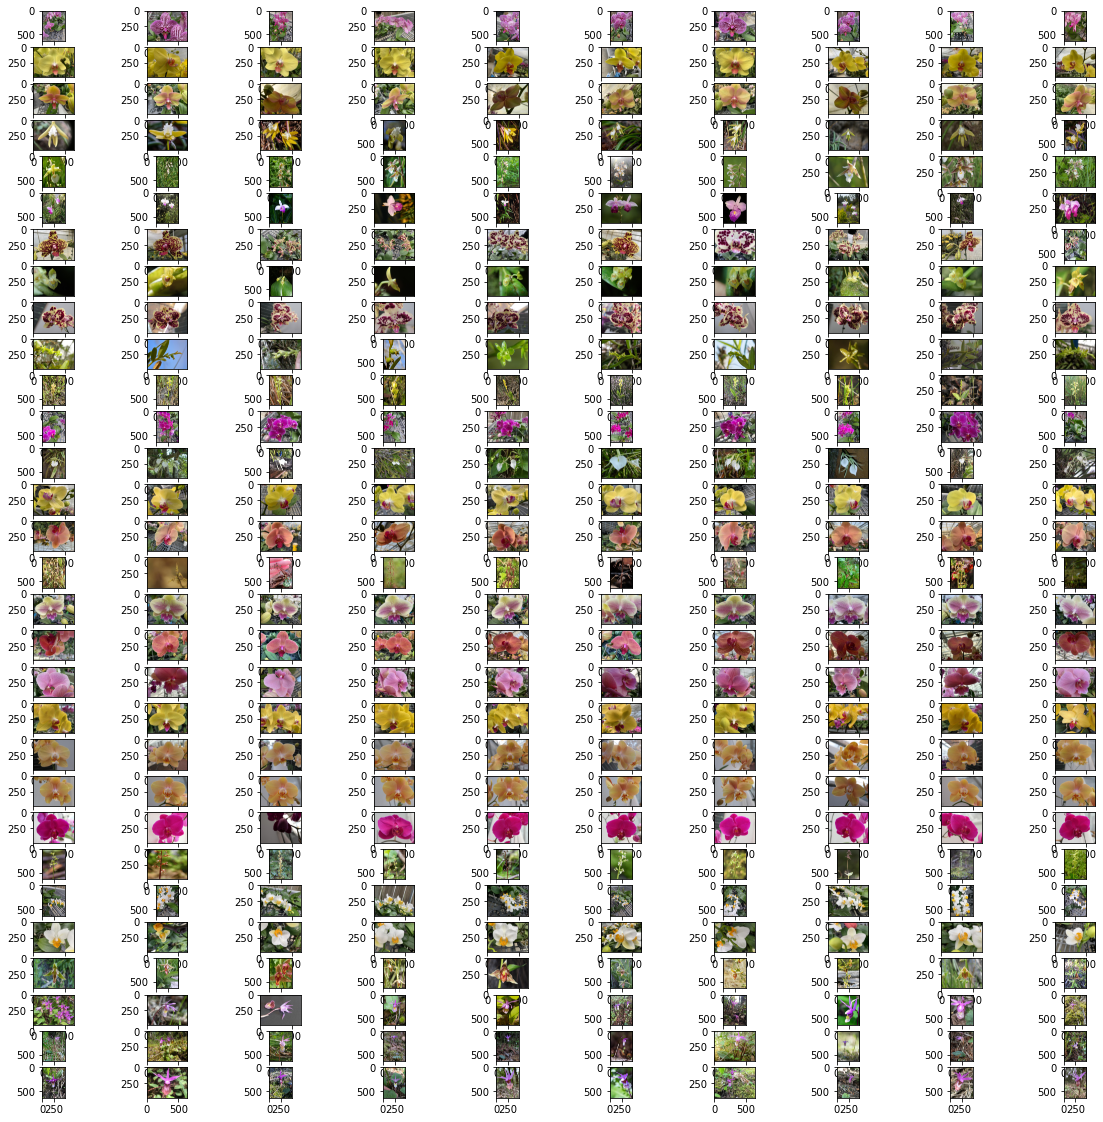

In [99]:
f, ax = plt.subplots(30, 10)
f.set_size_inches(20, 20)
im_scale_x=64
im_scale_y=64
img_idx = 0


for i in range(30):
    for j in range(10):
        #ax[i][j].set_title(data_labels.iloc[img_idx]['filename'])
        img = cv2.cvtColor(cv2.imread(data_labels.iloc[img_idx]['image_path']), cv2.COLOR_BGR2RGB)
        ax[i][j].imshow(img)
        img_idx = img_idx+1
            
plt.show()

## Prepare train, test and validation datasets

Import neccessary libraries

In [100]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img

Load dataset

In [101]:
train_data = np.array([img_to_array(load_img(img, target_size=(299, 299)))
                           for img in data_labels['image_path'].values.tolist()
                      ]).astype('float32')

Create train and validation datasets

In [102]:
x_train, x_val, y_train, y_val = train_test_split(train_data, target_labels,
                                                  test_size=0.1, 
                                                  stratify=np.array(target_labels), 
                                                  random_state=42)
print('Initial Dataset Size:', train_data.shape)
print('Train and Validation Datasets Size:', x_train.shape, x_val.shape)
print('Train and Validation Datasets Size:', x_train.shape, x_val.shape)


Initial Dataset Size: (2190, 299, 299, 3)
Train and Validation Datasets Size: (1971, 299, 299, 3) (219, 299, 299, 3)
Train and Validation Datasets Size: (1971, 299, 299, 3) (219, 299, 299, 3)


Convert the text class labels to one-hot encoded labels

In [103]:
y_train_ohe = pd.get_dummies(y_train.reset_index(drop=True)).to_numpy()
y_val_ohe = pd.get_dummies(y_val.reset_index(drop=True)).to_numpy()

y_train_ohe.shape, y_val_ohe.shape

((1971, 219), (219, 219))

### Image Augmentation

In [104]:
from keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 32

# Create train generator.
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true',
                                   zoom_range=0.2,
                                   brightness_range=[0.2,1.2]) # brightness)
train_generator = train_datagen.flow(x_train, y_train_ohe, shuffle=False, 
                                     batch_size=BATCH_SIZE, seed=1)
                                     
# Create validation generator
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = train_datagen.flow(x_val, y_val_ohe, shuffle=False, 
                                   batch_size=BATCH_SIZE, seed=1)       

### Show augmented images

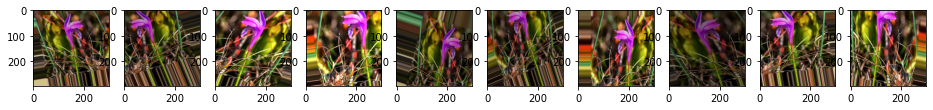

In [105]:
mg_id = 2595
temp_generator = train_datagen.flow(x_train[0:1], y_train[0:1],
                                   batch_size=1)



data = [next(temp_generator) for i in range(0,10)]
fig, ax = plt.subplots(1,10, figsize=(16, 6))
#print('Labels:', [item[1][0] for item in data])
l = [ax[i].imshow(data[i][0][0]) for i in range(0,10)]



### Model

In [121]:
base_model = tf.keras.applications.InceptionResNetV2(weights = 'imagenet', include_top = False, input_shape=(299, 299, 3))

for layer in base_model.layers:
  if layer.name == 'conv_7b':
    break
  layer.trainable = False
  print('Layer ' + layer.name + ' frozen.')

Layer input_14 frozen.
Layer conv2d_2639 frozen.
Layer batch_normalization_2639 frozen.
Layer activation_2639 frozen.
Layer conv2d_2640 frozen.
Layer batch_normalization_2640 frozen.
Layer activation_2640 frozen.
Layer conv2d_2641 frozen.
Layer batch_normalization_2641 frozen.
Layer activation_2641 frozen.
Layer max_pooling2d_52 frozen.
Layer conv2d_2642 frozen.
Layer batch_normalization_2642 frozen.
Layer activation_2642 frozen.
Layer conv2d_2643 frozen.
Layer batch_normalization_2643 frozen.
Layer activation_2643 frozen.
Layer max_pooling2d_53 frozen.
Layer conv2d_2647 frozen.
Layer batch_normalization_2647 frozen.
Layer activation_2647 frozen.
Layer conv2d_2645 frozen.
Layer conv2d_2648 frozen.
Layer batch_normalization_2645 frozen.
Layer batch_normalization_2648 frozen.
Layer activation_2645 frozen.
Layer activation_2648 frozen.
Layer average_pooling2d_13 frozen.
Layer conv2d_2644 frozen.
Layer conv2d_2646 frozen.
Layer conv2d_2649 frozen.
Layer conv2d_2650 frozen.
Layer batch_norm

Start adding top most layer

This layer converts a three-dimensional layer in the network into a one-dimensional vector to fit the input of a fully-connected layer for classification. For example, a 5x5x2 tensor would be converted into a vector of size 50. The previous convolutional layers of the network extracted the features from the input image, but now it is time to classify the features. We use the softmax function to classify these features, which requires a 1-dimensional input. This is why the flatten layer is necessary. This layer can be viewed by clicking any output class.

In [122]:
out = base_model.output
#out = keras.layers.Flatten()(out)

units: Positive integer, dimensionality of the output space.

no regulizer

In [123]:
out = keras.layers.GlobalAveragePooling2D()(out)
out = keras.layers.Dense(1000, activation='relu')(out)
out = keras.layers.Dense(1000, activation='relu')(out)
predictions = keras.layers.Dense(219, activation = 'softmax')(out)



Compile

In [124]:
model = Model(inputs = base_model.input, outputs = predictions)
opt = tf.keras.optimizers.Adam(learning_rate=0.0005) #orchid 0.0001
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2639 (Conv2D)           (None, 149, 149, 32  864         ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_2639 (Batc  (None, 149, 149, 32  96         ['conv2d_2639[0][0]']            
 hNormalization)                )                                                          

### Train 

In [125]:
# Train the model
batch_size = BATCH_SIZE
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size



history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=30, verbose=1)

/var/folders/sp/dlq99l1s5xqg739jglvhtv6h0000gn/T/ipykernel_22087/1526045733.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30


2022-05-07 16:24:24.838752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - ETA: 0s - loss: 5.1422 - accuracy: 0.0278

2022-05-07 16:25:37.409786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - 91s 1s/step - loss: 5.1422 - accuracy: 0.0278 - val_loss: 4.3853 - val_accuracy: 0.0729
Epoch 2/30
61/61 [==============================] - 88s 1s/step - loss: 3.7877 - accuracy: 0.1460 - val_loss: 3.4922 - val_accuracy: 0.1979
Epoch 3/30
61/61 [==============================] - 96s 2s/step - loss: 2.7511 - accuracy: 0.3017 - val_loss: 2.6779 - val_accuracy: 0.3281
Epoch 4/30
61/61 [==============================] - 97s 2s/step - loss: 2.0395 - accuracy: 0.4358 - val_loss: 2.4814 - val_accuracy: 0.3490
Epoch 5/30
61/61 [==============================] - 102s 2s/step - loss: 1.5080 - accuracy: 0.5678 - val_loss: 2.1548 - val_accuracy: 0.3906
Epoch 6/30
61/61 [==============================] - 107s 2s/step - loss: 1.2078 - accuracy: 0.6534 - val_loss: 2.1079 - val_accuracy: 0.4427
Epoch 7/30
61/61 [==============================] - 111s 2s/step - loss: 0.9728 - accuracy: 0.7210 - val_loss: 1.8100 - val_accuracy: 0.4948
Epoch 8/30
61/61 [==========

## Note

drop out
complex data augmentation: STN, Crop back sth
learning rate is important